In [2]:
import os
import sys
import copy

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
src_dir = os.path.join(project_dir, 'src')
fig_dir = os.path.join(project_dir, 'fig')
data_dir = os.path.join(project_dir, 'data')
log_dir = os.path.join(project_dir, 'log')
os.makedirs(fig_dir, exist_ok=True)

# Add the src directory to sys.path
sys.path.append(src_dir)
import matplotlib.pyplot as plt
import numpy as np

import mech.full_DPSGD as DPSGDModule
from analysis.tradeoff_Gaussian import Gaussian_curve
from mech.dpsgd_algs.train_neural_network import compute_accuracy_privacy_point
from mech.model_architecture import convnet_balanced

In [3]:
model_name = 'convnet_balanced'
database_size = 1000
internal_result_path = "/home/snek/martind/fdp/revision/results_yu"
epoch_list = [1, 10, 15, 20, 25]
delta = 1e-3
data_args = {
    "method": "default",
    "data_dir": data_dir,
    "internal_result_path": os.path.join(internal_result_path, 'train')
}


_, _, _, theoretical_upperbound_epsilons, _ = compute_accuracy_privacy_point(data_dir=data_dir, epoch_list=epoch_list, model_class=convnet_balanced, database_size=database_size, delta=delta)

/home/snek/.local/lib/python3.10/site-packages/opacus/privacy_engine.py:96: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
  warnings.warn(
  0%|                                                     | 0/2 [00:00<?, ?it/s]/home/snek/.local/lib/python3.10/site-packages/torch/nn/modules/module.py:1842: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)
100%|█████████████████████████████████████████████| 2/2 [00:03<00:00,  1.54s/it]


Final loss: [2.2997821063995363]
White image loss: [2.262521505355835]
Black image loss: [2.1462786197662354]
Achieved privacy: ε = [3.169888532688779] for δ = 0.001


100%|█████████████████████████████████████████████| 2/2 [00:03<00:00,  1.51s/it]


Final loss: [2.2997821063995363, 2.0480904579162598]
White image loss: [2.262521505355835, 0.8792039752006531]
Black image loss: [2.1462786197662354, 3.84363055229187]
Achieved privacy: ε = [3.169888532688779, 11.111740050324796] for δ = 0.001


100%|█████████████████████████████████████████████| 2/2 [00:03<00:00,  1.56s/it]


Final loss: [2.2997821063995363, 2.0480904579162598, 1.9831927862167358]
White image loss: [2.262521505355835, 0.8792039752006531, 1.0256417989730835]
Black image loss: [2.1462786197662354, 3.84363055229187, 4.403465270996094]
Achieved privacy: ε = [3.169888532688779, 11.111740050324796, 14.294007394362355] for δ = 0.001


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.47s/it]


Final loss: [2.2997821063995363, 2.0480904579162598, 1.9831927862167358, 1.9349396333694457]
White image loss: [2.262521505355835, 0.8792039752006531, 1.0256417989730835, 1.065727949142456]
Black image loss: [2.1462786197662354, 3.84363055229187, 4.403465270996094, 4.633764266967773]
Achieved privacy: ε = [3.169888532688779, 11.111740050324796, 14.294007394362355, 17.197031107176187] for δ = 0.001


100%|█████████████████████████████████████████████| 2/2 [00:03<00:00,  1.67s/it]


Final loss: [2.2997821063995363, 2.0480904579162598, 1.9831927862167358, 1.9349396333694457, 1.895667209625244]
White image loss: [2.262521505355835, 0.8792039752006531, 1.0256417989730835, 1.065727949142456, 0.7227943539619446]
Black image loss: [2.1462786197662354, 3.84363055229187, 4.403465270996094, 4.633764266967773, 4.858949661254883]
Achieved privacy: ε = [3.169888532688779, 11.111740050324796, 14.294007394362355, 17.197031107176187, 19.921268134378117] for δ = 0.001


In [4]:
estimated_lowerbound_epsilons = []

for epoch in epoch_list:
        epoch_args = DPSGDModule.generate_params(data_args=data_args, log_dir=log_dir, model_name=model_name, database_size=database_size, epochs=epoch, auditing_approach="1d_KLDivLoss")
        estimator_KL = DPSGDModule.DPSGD_PTLREstimator(epoch_args)
        estimator_KL.build(eta_max = 15)
        estimated_lowerbound_epsilons.append(estimator_KL.compute_eps_lower_bound(delta=delta))

05/22/2025 13:12:22:INFO:Initialized convnet_balanced_DPSGDSampler with parameters: batch_size=512, epochs=1, lr=0.10, sigma=1.00, max_grad_norm=1.00, device=cpu
05/22/2025 13:12:22:INFO:Found 1000 samples in /home/snek/martind/fdp/revision/results_yu/train/convnet_balanced_1000_1/samples_folder. Skipping generation.
05/22/2025 13:12:40:INFO:Initialized convnet_balanced_DPSGDSampler with parameters: batch_size=512, epochs=10, lr=0.10, sigma=1.00, max_grad_norm=1.00, device=cpu
05/22/2025 13:12:40:INFO:Found 1000 samples in /home/snek/martind/fdp/revision/results_yu/train/convnet_balanced_1000_10/samples_folder. Skipping generation.
05/22/2025 13:12:58:INFO:Initialized convnet_balanced_DPSGDSampler with parameters: batch_size=512, epochs=15, lr=0.10, sigma=1.00, max_grad_norm=1.00, device=cpu
05/22/2025 13:12:58:INFO:Found 1000 samples in /home/snek/martind/fdp/revision/results_yu/train/convnet_balanced_1000_15/samples_folder. Skipping generation.
05/22/2025 13:13:16:INFO:Initialized co

05/22/2025 13:13:51:WARNING:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


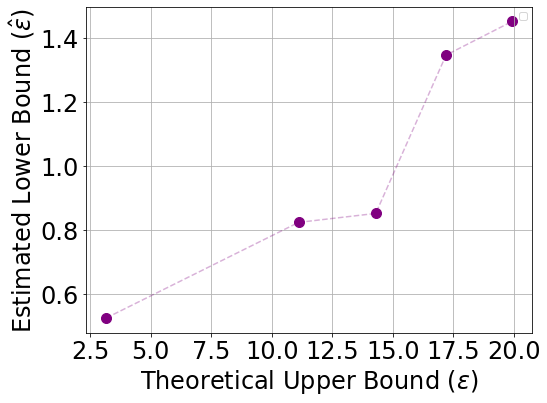

In [5]:

file_name = os.path.join(fig_dir, f"Lower_bound_fig.png")

plt.figure(figsize=(8, 6))

# Plot points
plt.scatter(theoretical_upperbound_epsilons, estimated_lowerbound_epsilons, 
            color='purple', s=100)

# Plot connecting lines
plt.plot(theoretical_upperbound_epsilons, estimated_lowerbound_epsilons, 
        color='purple', alpha=0.3, linestyle='--')

plt.xlabel(r'Theoretical Upper Bound ($\varepsilon$)', fontsize=24)
plt.ylabel(r'Estimated Lower Bound ($\hat{\varepsilon}$)', fontsize=24)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.legend()
plt.savefig(file_name, bbox_inches='tight', dpi=300)

plt.show()